## About Dataset
### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Importing the liberary

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Importing the dataset

In [37]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.shape

(7043, 21)

## Feature engineering on the dataset

In [39]:
df.drop('customerID', axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [42]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [43]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [44]:
# Count the total number of null values in each column
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
# Count the total number of null values in the DataFrame
df.isnull().sum().sum()

11

In [46]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7043, 20)

In [47]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [49]:
df1[df1.Churn=="No"].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## EDA on the dataset

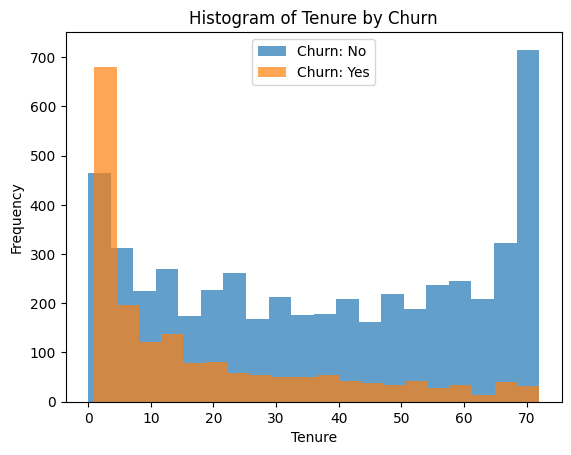

In [50]:
import matplotlib.pyplot as plt

# Assuming a and b are DataFrame slices based on "Churn" values
a = df1[df1["Churn"] == "No"]["tenure"]
b = df1[df1["Churn"] == "Yes"]["tenure"]

# Plot separate histograms for a and b
plt.hist(a, bins=20, alpha=0.7, label="Churn: No")
plt.hist(b, bins=20, alpha=0.7, label="Churn: Yes")

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure by Churn')
plt.legend()  # Add legend

# Show the plot
plt.show()

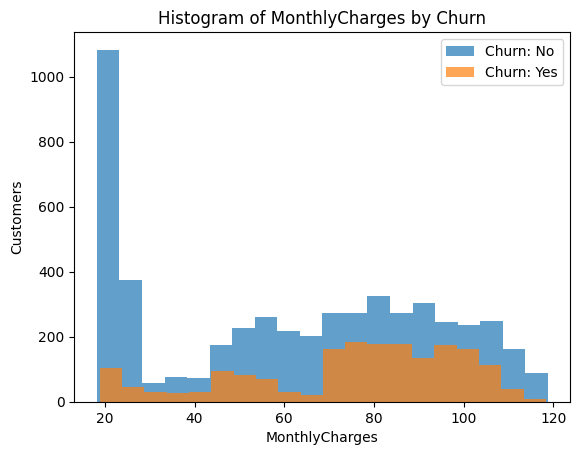

In [51]:
month_charge_churn_no = df1[df1["Churn"]=="No"].MonthlyCharges
month_charge_churn_yes = df1[df1["Churn"]=="Yes"].MonthlyCharges

plt.hist(month_charge_churn_no, bins=20, alpha=0.7, label="Churn: No")
plt.hist(month_charge_churn_yes, bins=20, alpha=0.7, label="Churn: Yes")

plt.xlabel('MonthlyCharges')
plt.ylabel('Customers')
plt.title('Histogram of MonthlyCharges by Churn')
plt.legend()  # Add legend

# Show the plot
plt.show()

## Feature engineering

In [52]:
for i in df1.columns:
    if df1[i].dtypes == "object":
        print(f"{i} columns: {df1[i].unique()}")

gender columns: ['Female' 'Male']
Partner columns: ['Yes' 'No']
Dependents columns: ['No' 'Yes']
PhoneService columns: ['No' 'Yes']
MultipleLines columns: ['No phone service' 'No' 'Yes']
InternetService columns: ['DSL' 'Fiber optic' 'No']
OnlineSecurity columns: ['No' 'Yes' 'No internet service']
OnlineBackup columns: ['Yes' 'No' 'No internet service']
DeviceProtection columns: ['No' 'Yes' 'No internet service']
TechSupport columns: ['No' 'Yes' 'No internet service']
StreamingTV columns: ['No' 'Yes' 'No internet service']
StreamingMovies columns: ['No' 'Yes' 'No internet service']
Contract columns: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling columns: ['Yes' 'No']
PaymentMethod columns: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn columns: ['No' 'Yes']


In [54]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [55]:
df1.replace('Yes',1,inplace=True)
df1.replace('No',0,inplace=True)

In [56]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [57]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [58]:
for i in df1.columns:
    if df1[i].dtypes == "object":
        print(f"{i} columns: {df1[i].unique()}")

gender columns: ['Female' 'Male']
InternetService columns: ['DSL' 'Fiber optic' 0]
Contract columns: ['Month-to-month' 'One year' 'Two year']
PaymentMethod columns: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [59]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [60]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [61]:
df1["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [69]:
df1.replace("Female",1,inplace=True)
df1.replace("Male",0, inplace=True)

In [70]:
df1["gender"].dtype

dtype('int64')

In [71]:
df1["InternetService"].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

We will do on hot encoding insted of doing this.

In [72]:
# df1["Contract"].replace({'Month-to-month':0, 'One year':1, 'Two year':2},inplace=True)
# df1["Contract"].unique()

In [73]:
df1["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

We will do on hot encoding insted of doing this.

In [74]:
# df1["Contract"].replace({'Month-to-month':0, 'One year':1, 'Two year':2},inplace=True)
# df1["Contract"].unique()

In [76]:
df1.shape

(7043, 20)

In [75]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [77]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [84]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                             bool
InternetService_DSL                           bool
InternetService_Fiber optic    

In [85]:
df2.replace({True:1,False:2}, inplace=True)

In [86]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,2,1,2,1,2,2,2,2,1,2
1,0,0,0,0,34,1,0,1,0,1,...,2,1,2,2,1,2,2,2,2,1
2,0,0,0,0,2,1,0,1,1,0,...,2,1,2,1,2,2,2,2,2,1
3,0,0,0,0,45,0,0,1,0,1,...,2,1,2,2,1,2,1,2,2,2
4,1,0,0,0,2,1,0,0,0,0,...,2,2,1,1,2,2,2,2,1,2


In [87]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [96]:
for i in df2:
    unique_values = df2[i].unique()
    print(f'Column {i}: {unique_values}')

Column gender: [1 0]
Column SeniorCitizen: [0 1]
Column Partner: [1 0]
Column Dependents: [0 1]
Column tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column PhoneService: [0 1]
Column MultipleLines: [0 1]
Column OnlineSecurity: [0 1]
Column OnlineBackup: [1 0]
Column DeviceProtection: [0 1]
Column TechSupport: [0 1]
Column StreamingTV: [0 1]
Column StreamingMovies: [0 1]
Column PaperlessBilling: [1 0]
Column MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column Churn: [0 1]
Column InternetService_0: [2 1]
Column InternetService_DSL: [1 2]
Column InternetService_Fiber optic: [2 1]
Column Contract_Month-to-month: [1 2]
Column Contract_One year: [2 1]
Column Contract_Two year: [2 1]
Column PaymentMethod_Bank transfer (auto

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [107]:
scaler.fit_transform(df2)

array([[1., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [108]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,2,1,2,1,2,2,2,2,1,2
1,0,0,0,0,34,1,0,1,0,1,...,2,1,2,2,1,2,2,2,2,1
2,0,0,0,0,2,1,0,1,1,0,...,2,1,2,1,2,2,2,2,2,1
3,0,0,0,0,45,0,0,1,0,1,...,2,1,2,2,1,2,1,2,2,2
4,1,0,0,0,2,1,0,0,0,0,...,2,2,1,1,2,2,2,2,1,2


## Splitting the dataset

In [112]:
X = df2.drop("Churn", axis='columns')
y = df2["Churn"]

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
X_train.shape

(5634, 26)

### Training the model

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [123]:
model  = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [124]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [125]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6889
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7345
Epoch 11/100
177/17

In [138]:
yp = model.predict(X_test)
yp[:5]

1/1 [==============================] - 0s 144ms/step


array([[0.6361644 ],
       [0.67259896],
       [0.6673843 ],
       [0.5538794 ],
       [0.64700454]], dtype=float32)

In [140]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.44      0.80      0.57        10

    accuracy                           0.40        20
   macro avg       0.22      0.40      0.29        20
weighted avg       0.22      0.40      0.29        20



Text(95.72222222222221, 0.5, 'Truth')

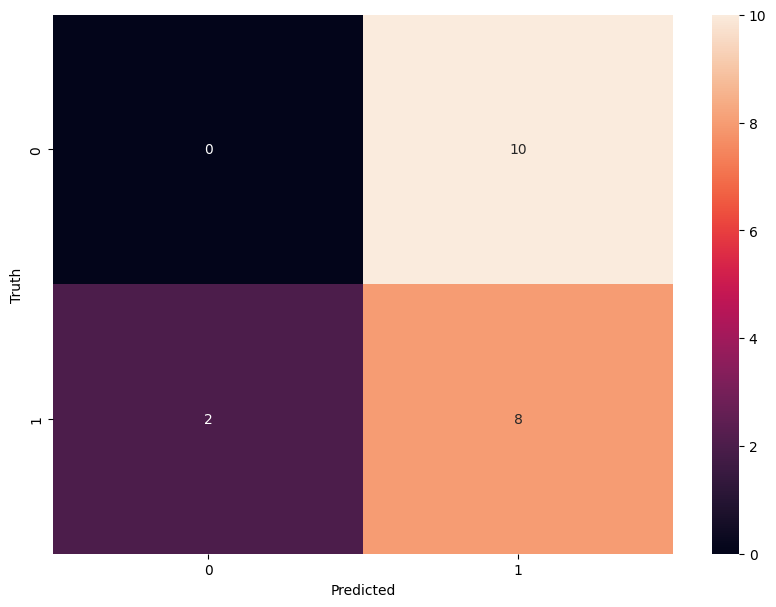

In [142]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')